# Internship Project
#### Jack Kelly

Let's load our packages and get started!

In [222]:
# Load packagess
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pybaseball import statcast
from pybaseball import cache
import warnings

warnings.filterwarnings("ignore")

I utilize the pandas library most often in the following code. I use matplotlib to plot some cool scatter plots and distribution plots, and I use pybaseball to query some data from the previous MLB regular season.

I first loaded in the data provided to me. I dropped all of the rows that didn't have both a speed_A and a speed_B, though my system still works for all of the rows in the initial spreadsheet. I then reinitialized my index in order to use the correct index in later code.

Next, I plotted the resulting data using a scatter plot to get a better idea of what I was working with, as well as MLB batted ball data from the month of July for the sake of comparison. I only used the month of July because I assume MLB month-to-month EV and LA variations are minimal, and especially not worth the time it would take to query a season's worth of data.

This is a large query, it may take a moment to complete


100%|██████████████████████████████████████████████████████████████████| 31/31 [00:07<00:00,  4.09it/s]


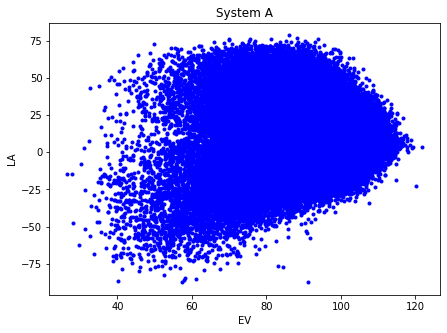

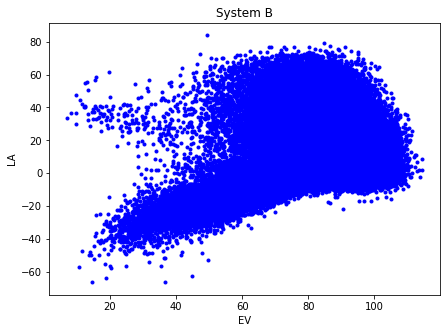

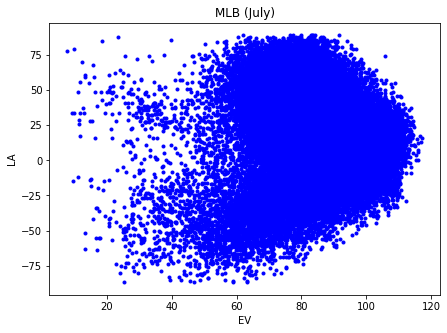

In [223]:
data = pd.read_csv('battedBallData.csv')
data = data.dropna()
data.reset_index(drop=True, inplace=True)

mlb = statcast('2022-07-01', '2022-07-31')
mlb = mlb[mlb['launch_speed'].notna()]
mlb = mlb[mlb['launch_angle'].notna()]

plt.figure(figsize=(7, 5))
plt.title("System A")
plt.xlabel('EV')
plt.ylabel('LA')
plt.plot(data.speed_A, data.vangle_A, 'b.')

plt.figure(figsize=(7, 5))
plt.title("System B")
plt.xlabel('EV')
plt.ylabel('LA')
plt.plot(data.speed_B, data.vangle_B, 'b.')   

plt.figure(figsize=(7, 5))
plt.title("MLB (July)")
plt.xlabel('EV')
plt.ylabel('LA')
plt.plot(mlb.launch_speed, mlb.launch_angle, 'b.') 

We assume that MLB's current system to measure batted balls is the true system. From a glance, it looks like System B understates EV, while System A is more closely related to MLB's data, which was suspected in the project's prompt.

The numbers directly below come from the data from MLB. They are the average EVs at each MLB batted ball type. I deleted the code to get these numbers because it was redundant, but I created DataFrames such that the exit velocity and launch angle data only included batted balls of type popup, ground_ball, etc. I exported these DataFrames to .csv and averaged EV and LA using Excel formulas. In the future, I could refactor this for reusability sake and use the DataFrame .mean method instead of having magic numbers, but for the purpose of this project, it is not necessary.

A small thing to note: because batted ball types are being given by a human watching the game, we instead want to use the system's objective LA reading to determine batted ball type.

MLB's system for determining batted balls is this:

    Ground ball: Less than 10 degrees
    Line drive: 10-25 degrees
    Fly ball: 25-50 degrees
    Pop up: Greater than 50 degrees
So we will use the same to avoid any human error. 

Note: This also assumes that the systems are within a couple degrees accuracy on all batted balls compared to MLB's system. I know this to be true because I used a more naive approach before pivoting to this strategy.

## Finding Averages of the Systems

In [225]:
mlbEV, mlbLA = 88.01961955, 12.52852988
popupEV, popupLA = 75.99950877, 65.48842105
ldEV, ldLA = 93.1406322, 16.37282813
gbEV, gbLA = 84.93576762, -13.12756052
fbEV, fbLA = 91.72842718, 37.11203883

def realTypeA(row):
  if row['vangle_A'] < 10:
    return 'ground_ball'
  elif row['vangle_A'] >= 25 and row['vangle_A'] < 50:
    return 'fly_ball'
  elif row['vangle_A'] >= 50:
    return 'popup'
  else: 
    return 'line_drive'
def realTypeB(row):
  if row['vangle_B'] < 10:
    return 'ground_ball'
  elif row['vangle_B'] >= 25 and row['vangle_B'] < 50:
    return 'fly_ball'
  elif row['vangle_B'] >= 50:
    return 'popup'
  else: 
    return 'line_drive'

data['realTypeA'] = data.apply(realTypeA, axis=1)
data['realTypeB'] = data.apply(realTypeB, axis=1)


df_ground_ballA = data[data['realTypeA'] == 'ground_ball']
df_ground_ballB = data[data['realTypeB'] == 'ground_ball']

df_fly_ballA = data[data['realTypeA'] == 'fly_ball']
df_fly_ballB = data[data['realTypeB'] == 'fly_ball']

df_line_driveA = data[data['realTypeA'] == 'line_drive']
df_line_driveB = data[data['realTypeB'] == 'line_drive']

df_pop_upA = data[data['realTypeA'] == 'popup']
df_pop_upB = data[data['realTypeB'] == 'popup']

print("Averages of given dataset:")
display(data.mean(axis=0).drop(['batter', 'pitcher']))
print("-------------------------------------------------------")

print("Averages of ground ball data for A:")
display(df_ground_ballA.mean(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Averages of ground ball data for B:")
display(df_ground_ballB.mean(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))
print("-------------------------------------------------------")

print("Averages of line drive data for A:")
display(df_line_driveA.mean(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Averages of line drive data for B:")
display(df_line_driveB.mean(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))
print("-------------------------------------------------------")

print("Averages of fly ball data for A:")
display(df_fly_ballA.mean(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Averages of fly ball data for B:")
display(df_fly_ballB.mean(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))
print("-------------------------------------------------------")

print("Averages of pop up data for A:")
display(df_pop_upA.mean(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Averages of pop up data for B:")
display(df_pop_upB.mean(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))

Averages of given dataset:


speed_A     88.511052
vangle_A    10.823236
speed_B     79.859539
vangle_B    12.452809
dtype: float64

-------------------------------------------------------
Averages of ground ball data for A:


speed_A     87.791678
vangle_A    -8.894243
dtype: float64

Averages of ground ball data for B:


speed_B     74.456022
vangle_B    -5.427453
dtype: float64

-------------------------------------------------------
Averages of line drive data for A:


speed_A     92.427847
vangle_A    17.462950
dtype: float64

Averages of line drive data for B:


speed_B     88.144058
vangle_B    17.455502
dtype: float64

-------------------------------------------------------
Averages of fly ball data for A:


speed_A     87.77009
vangle_A    35.07897
dtype: float64

Averages of fly ball data for B:


speed_B     83.774551
vangle_B    35.213870
dtype: float64

-------------------------------------------------------
Averages of pop up data for A:


speed_A     81.055499
vangle_A    57.814630
dtype: float64

Averages of pop up data for B:


speed_B     78.394329
vangle_B    58.032965
dtype: float64

Now we can better see how each system works. System B is off from MLB average by about 8 mph EV. System A is right on the money compared to the average EV of MLB. Both systems are pretty similar at measuring LA. 

System A has a higher EV for every batted ball type. Again, their LAs for each batted ball type are pretty similar, apart from a 3 degree difference measuring ground balls. 

System B vastly understates ground ball EV compared to System A and MLB. This is where the main discrepancy in average EV between systems lies. This could be of note, as one system could project a lower LA hitter that makes his money off infield hits a lot differently than another. Alternatively, a system that understates EV at lower LAs could incentivize different approaches to hitting. We've seen an increase in strikeouts over the past decade while also seeing an increase in average LA. Good organizations center their game strategy around data. Systems matter.

## Creating the System

In [226]:
for k in range(len(data.index)):
    if data.loc[k, 'realTypeA'] == 'ground_ball':
        data.loc[k,'speed_A'] = data.loc[k, 'speed_A'] + (gbEV - 87.791678)
        data.loc[k,'vangle_A'] = data.loc[k, 'vangle_A'] + (gbLA - -8.894243)
    
    if data.loc[k, 'realTypeB'] == 'ground_ball':
        data.loc[k,'vangle_B'] = data.loc[k, 'vangle_B'] + (gbLA - -6.823490)
        data.loc[k,'speed_B'] = data.loc[k, 'speed_B'] + (gbEV - 79.859539)*2.1
   
    if data.loc[k, 'realTypeA'] == 'line_drive':
        data.loc[k, 'speed_A'] = data.loc[k, 'speed_A'] + (ldEV - 92.850515)
        data.loc[k,'vangle_A'] = data.loc[k, 'vangle_A'] + (ldLA - 15.822192)
    
    if data.loc[k, 'realTypeB'] == 'line_drive':
        data.loc[k,'vangle_B'] = data.loc[k, 'vangle_B'] + (ldLA - 15.345541)
        data.loc[k,'speed_B'] = data.loc[k, 'speed_B'] + (ldEV - 88.787013)*1.15
    
    if data.loc[k, 'realTypeA'] == 'fly_ball':
        data.loc[k, 'speed_A'] = data.loc[k, 'speed_A'] + (fbEV - 90.065676)
        data.loc[k,'vangle_A'] = data.loc[k, 'vangle_A'] + (fbLA - 35.297617)
    
    if data.loc[k, 'realTypeB'] == 'fly_ball':
        data.loc[k,'vangle_B'] = data.loc[k, 'vangle_B'] + (fbLA - 35.643639)
        data.loc[k,'speed_B'] = data.loc[k, 'speed_B'] + (fbEV - 86.312760)*1.12
    
    if data.loc[k, 'realTypeA'] == 'popup':
        data.loc[k, 'speed_A'] = data.loc[k, 'speed_A'] + (popupEV - 81.055499)
        data.loc[k,'vangle_A'] = data.loc[k, 'vangle_A'] + (popupLA - 57.814630)
    
    if data.loc[k, 'realTypeB'] == 'popup':
        data.loc[k,'vangle_B'] = data.loc[k, 'vangle_B'] + (popupLA - 58.032965)
        data.loc[k,'speed_B'] = data.loc[k, 'speed_B'] + (popupEV - 78.394329)

In [227]:
df_ground_ballA = data[data['realTypeA'] == 'ground_ball']
df_ground_ballB = data[data['realTypeB'] == 'ground_ball']

df_fly_ballA = data[data['realTypeA'] == 'fly_ball']
df_fly_ballB = data[data['realTypeB'] == 'fly_ball']

df_line_driveA = data[data['realTypeA'] == 'line_drive']
df_line_driveB = data[data['realTypeB'] == 'line_drive']

df_pop_upA = data[data['realTypeA'] == 'popup']
df_pop_upB = data[data['realTypeB'] == 'popup']

print("Averages of given dataset (after):")
display(data.mean(axis=0).drop(['batter', 'pitcher']))
print("-------------------------------------------------------")

print("Averages of ground ball data for A (after):")
display(df_ground_ballA.mean(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Averages of ground ball data for B (after):")
display(df_ground_ballB.mean(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))
print("-------------------------------------------------------")

print("Averages of line drive data for A (after):")
display(df_line_driveA.mean(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Averages of line drive data for B (after):")
display(df_line_driveB.mean(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))
print("-------------------------------------------------------")

print("Averages of fly ball data for A (after):")
display(df_fly_ballA.mean(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Averages of fly ball data for B (after):")
display(df_fly_ballB.mean(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))
print("-------------------------------------------------------")

print("Averages of pop up data for A (after):")
display(df_pop_upA.mean(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Averages of pop up data for B (after):")
display(df_pop_upB.mean(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))

Averages of given dataset (after):


speed_A     87.313425
vangle_A     9.711628
speed_B     87.495261
vangle_B    10.314929
dtype: float64

-------------------------------------------------------
Averages of ground ball data for A (after):


speed_A     84.935767
vangle_A   -13.127560
dtype: float64

Averages of ground ball data for B (after):


speed_B     85.116102
vangle_B   -11.731524
dtype: float64

-------------------------------------------------------
Averages of line drive data for A (after):


speed_A     92.717964
vangle_A    18.013586
dtype: float64

Averages of line drive data for B (after):


speed_B     93.150720
vangle_B    18.482789
dtype: float64

-------------------------------------------------------
Averages of fly ball data for A (after):


speed_A     89.432841
vangle_A    36.893392
dtype: float64

Averages of fly ball data for B (after):


speed_B     89.840098
vangle_B    36.682269
dtype: float64

-------------------------------------------------------
Averages of pop up data for A (after):


speed_A     75.999509
vangle_A    65.488421
dtype: float64

Averages of pop up data for B (after):


speed_B     75.999509
vangle_B    65.488421
dtype: float64

See that my system holds for rows that don't have data for both systems. If there is data for speed_A, find the true batted ball type and add the speed_A value to the difference of the difference between the MLB average and system A average times a constant used to scale. Vice versa for System B. 

## Max, Min, Medians

In [237]:
maxSpeedA = max(data.speed_A)
maxSpeedB = max(data.speed_B)
minSpeedA = min(data.speed_A)
minSpeedB = min(data.speed_B)
maxMLB = max(mlb.launch_speed)
minMLB = min(mlb.launch_speed)

maxString = "Max EV (A): {} Max EV (B): {} Max EV (MLB): {}".format(round(maxSpeedA, 2), round(maxSpeedB, 2), round(maxMLB, 2))
minString = "Min EV (A): {} Min EV (B): {} Min EV (MLB): {}".format(round(minSpeedA, 2), round(minSpeedB, 2), round(minMLB, 2))
print(string)
print(minString)

Max EV (A): 118.99 Max EV (B): 125.06 Max EV (MLB): 117.2
Min EV (A): 23.61 Min EV (B): 10.18 Min EV (MLB): 7.8


It looks like my new system isn't great at quantifying EV at the edge cases. We can alleviate this by averaging the two EVs from each system if we have the luxary of having both data points, but still we have a value that is a handful of MPH off. Let's evaluate our median values. 

In [239]:
print("Medians of given dataset (after):")
display(data.median(axis=0).drop(['batter', 'pitcher']))
print("-------------------------------------------------------")

print("Medians of ground ball data for A (after):")
display(df_ground_ballA.median(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Medians of ground ball data for B (after):")
display(df_ground_ballB.median(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))
print("-------------------------------------------------------")

print("Medians of line drive data for A (after):")
display(df_line_driveA.median(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Medians of line drive data for B (after):")
display(df_line_driveB.median(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))
print("-------------------------------------------------------")

print("Medians of fly ball data for A (after):")
display(df_fly_ballA.median(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Medians of fly ball data for B (after):")
display(df_fly_ballB.median(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))
print("-------------------------------------------------------")

print("Medians of pop up data for A (after):")
display(df_pop_upA.median(axis=0).drop(['batter', 'pitcher', 'speed_B', 'vangle_B']))
print("Medians of pop up data for B (after):")
display(df_pop_upB.median(axis=0).drop(['batter', 'pitcher', 'speed_A', 'vangle_A']))

Medians of given dataset (after):


speed_A     89.748337
vangle_A    11.544363
speed_B     90.266073
vangle_B    11.503506
dtype: float64

-------------------------------------------------------
Medians of ground ball data for A (after):


speed_A     87.698057
vangle_A   -10.191116
dtype: float64

Medians of ground ball data for B (after):


speed_B     86.267064
vangle_B   -10.182296
dtype: float64

-------------------------------------------------------
Medians of line drive data for A (after):


speed_A     94.980263
vangle_A    18.016117
dtype: float64

Medians of line drive data for B (after):


speed_B     95.376092
vangle_B    18.471484
dtype: float64

-------------------------------------------------------
Medians of fly ball data for A (after):


speed_A     91.226161
vangle_A    35.852026
dtype: float64

Medians of fly ball data for B (after):


speed_B     91.962914
vangle_B    35.714194
dtype: float64

-------------------------------------------------------
Medians of pop up data for A (after):


speed_A     77.173305
vangle_A    64.570176
dtype: float64

Medians of pop up data for B (after):


speed_B     77.214314
vangle_B    64.522448
dtype: float64

## Data Visualization

[Text(0.5, 1.0, 'MLB EV')]

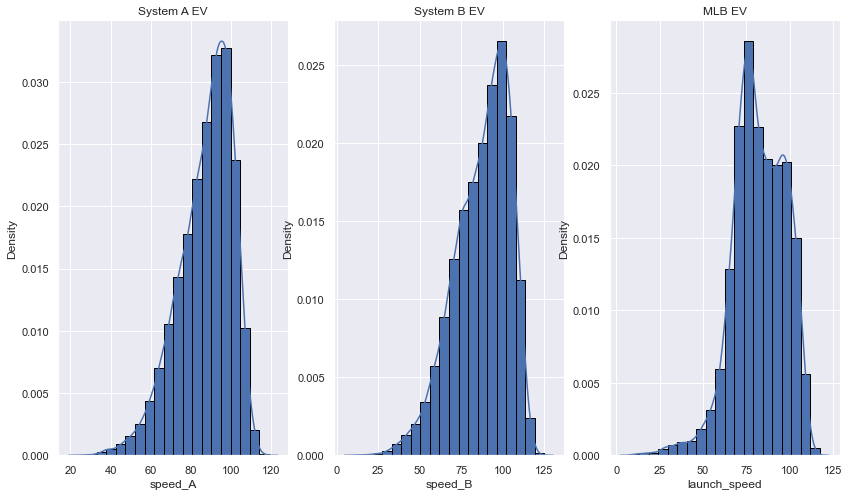

In [254]:
sns.set(rc={'figure.figsize':(14,8)})
fig, ax = plt.subplots(1, 3)
sns.distplot(data.speed_A, bins=20, hist_kws={"rwidth":1,'edgecolor':'black', 'alpha':1.0}, ax=ax[0]).set(title='System A EV')

sns.distplot(data.speed_B, bins=20, hist_kws={"rwidth":1,'edgecolor':'black', 'alpha':1.0}, ax=ax[1]).set(title='System B EV')

sns.distplot(mlb.launch_speed, bins=20, hist_kws={"rwidth":1,'edgecolor':'black', 'alpha':1.0}, ax=ax[2]).set(title='MLB EV')

Our data is a little left skewed for each, which was already evident by the difference in median and mode. Yet both systems resemble the MLB graph fairly closely.

## Conclusion

I feel confident that I have built a system from the data that accurately scales to MLB within a few MPH. As I mentioned earlier, systems matter. As we look towards the future, more and more organizations will start to shape their approaches based on data. At a very base level, teams shape their lineup around matchups and batting average: place high BA guys in the top half of the line up, low BA guys to the bottom half. As you move up in complexity, teams start shaping their lineups around sabermetrics like wRC, wOBA, etc. My point is, without accurate data, it will be near impossible to use that data to help your team win games. 

Some ideas for future work on this project:

        1. Average each player's exit velocity from each of their batted balls (if > N plate appearances) and see what percentile the original system would've had him in. 
        
        2. You could find each players 90th percentile EV (90th percentile EV correlates better to year to year performance than mean).
        
        3. You could try to see where real life MLB hitters would rank based on each original system.
        
        